## Exploração dos dados

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.6 MB/s eta 0:00:00


In [35]:
colunas = ['Feature', 'ML0', 'ML1', 'p-value']
df_features = pd.read_csv(
    'significant_features_final.csv',
    usecols=[0, 1, 2, 3],
    names=colunas
)
linhas_para_remover = ['len', 'R', 'K', 'A', 'L', 'G', 'C', 'W', 'P', 'H', 'nS', 'nO', 'nC', 'nH', 'nN', 'nan']
feat_col = df_features.columns[0]           # ajuste se a coluna for outra
df_features[feat_col] = df_features[feat_col].astype(str).str.strip()
df_features= df_features[~df_features[feat_col].isin(linhas_para_remover)]

df_features.head(500)

,Feature,ML0,ML1,p-value
1,normC,0.0,0.1578947368421052,0.0
3,normnS,0.0025873264516474,0.0114285714285714,0.0
4,normAW,0.0,0.0,0.0
5,AW,0.0,0.0,0.0
7,normCP,0.0,0.0,5.19610557204008e-124
...,...,...,...,...
504,GIC,0.0,0.0,6.995670541556626e-07
505,PRI,0.0,0.0,7.196197076157001e-07
506,SM,0.0,0.0,7.717318024112605e-07
507,CGI,0.0,0.0,8.196709162873665e-07


In [36]:
df_features.tail()

,Feature,ML0,ML1,p-value
3015,API,0.0,0.0,0.049498766252101256
3016,FLN,0.0,0.0,0.0495397155066145
3017,KNR,0.0,0.0,0.04964962178441049
3018,CTI,0.0,0.0,0.049701410492750564
3019,DTC,0.0,0.0,0.049850556274137384


##Aplicação PCA

In [19]:
df_toxic = pd.read_csv("/content/cpps-toxic_trained_matrix-pos3528-neg3528.csv")

In [37]:
df_toxic.head()

,seq,len,R,normR,K,normK,A,normA,L,normL,...,norm_polar_non_charged_negatively_charged_CKSAAGP,norm_positively_charged_hydrophobic_CKSAAGP,norm_positively_charged_polar_non_charged_CKSAAGP,norm_positively_charged_positively_charged_CKSAAGP,norm_positively_charged_negatively_charged_CKSAAGP,norm_negatively_charged_hydrophobic_CKSAAGP,norm_negatively_charged_polar_non_charged_CKSAAGP,norm_negatively_charged_positively_charged_CKSAAGP,norm_negatively_charged_negatively_charged_CKSAAGP,label
0,KAKCADIDQPCKTSCDCCETKGACTCYKSGCVCRMGSF,38,1,0.026316,5,0.131579,3,0.078947,0,0.000000,...,0.026316,0.052632,0.026316,0.026316,0.0,0.026316,0.00,0.026316,0.026316,1
1,VALTGLTVAEYFR,13,1,0.076923,0,0.000000,2,0.153846,2,0.153846,...,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.00,0.000000,0.000000,1
2,LVALDTEFANR,11,1,0.090909,0,0.000000,2,0.181818,2,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.00,0.000000,0.090909,0
3,MKFNNAGAQGRDRGYIYSEPEFGRTRQVFY,30,4,0.133333,1,0.033333,2,0.066667,0,0.000000,...,0.000000,0.033333,0.033333,0.066667,0.0,0.000000,0.00,0.000000,0.033333,0
4,LHSNLEYQYRYSGRVASGIP,20,2,0.100000,0,0.000000,1,0.050000,2,0.100000,...,0.050000,0.050000,0.100000,0.000000,0.0,0.000000,0.05,0.000000,0.000000,0


In [43]:
df_final = df_toxic.copy()

In [69]:
import pandas as pd

def filtrar_colunas_norm_ou_siglas(
    df: pd.DataFrame,
    inplace: bool = False,
    keep_always = ("seq", "label"),
) -> pd.DataFrame:
    """
    Mantém apenas colunas que:
      - contêm 'norm' (case-insensitive), OU
      - são exatamente 3 letras (A-Z/a-z), OU
      - estão na lista keep_always (ex.: 'len', 'label').

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame de entrada.
    inplace : bool, padrão False
        Se True, altera o df original e o retorna.
        Se False, retorna uma cópia filtrada.
    keep_always : Iterable[str], padrão ('len', 'label')
        Nomes de colunas que nunca devem ser removidos (case-insensitive).

    Retorno
    -------
    pd.DataFrame
        DataFrame com as colunas filtradas.
    """
    keep_set = {str(k).lower() for k in keep_always}

    def keep(col):
        name_str = str(col)
        lname = name_str.lower()

        # Nunca remover as colunas protegidas
        if lname in keep_set:
            return True

        # Regras gerais
        if isinstance(col, str):
            has_norm = "norm" in lname
            is_three_letters = (len(col) == 3) and col.isalpha()
            return has_norm or is_three_letters
        else:
            # Nomes não-string: mantém se contiver 'norm'
            return "norm" in lname

    cols_to_keep = [c for c in df.columns if keep(c)]

    if inplace:
        cols_to_drop = [c for c in df.columns if c not in cols_to_keep]
        if cols_to_drop:
            df.drop(columns=cols_to_drop, inplace=True)
        return df
    else:
        return df.loc[:, cols_to_keep].copy()


In [70]:
import os
import numpy as np
import pandas as pd
from scipy import stats

def _fdr_bh(pvals: np.ndarray) -> np.ndarray:
    """
    Correção de múltiplas comparações FDR Benjamini–Hochberg.
    Retorna q-values no mesmo formato de pvals.
    """
    p = np.asarray(pvals, dtype=float)
    n = p.size
    order = np.argsort(p)
    ranked = np.empty_like(order, dtype=float)

    # q_i = p_(i) * n / i  (depois aplica monotonicidade reversa)
    cummin = 1.0
    for i, idx in enumerate(order, start=1):
        q = p[idx] * n / i
        cummin = min(cummin, q)
        ranked[idx] = cummin
    return np.clip(ranked, 0, 1)

def mann_whitney_screen_csv_fdr(base: str, alpha: float = 0.05,
                                label_col: str = "label",
                                pvals_checkpoint: str = "mw_pvals_checkpoint.csv"):
    """
    Executa MWU em todas as features (colunas 1:-1), aplica FDR-BH e salva resultados.
    - Retomável: se existir `mw_pvals_checkpoint.csv`, continua de onde parou.
    - Salva:
        * mw_pvals_final.csv (todas as features com p e q)
        * significant_features_fdr.csv (apenas q < alpha)
    """
    # Carrega dados
    df = base
    features = df.columns[1:-1]  # primeira coluna = sequência, última = label (ajuste se necessário)

    # Garante que temos rótulos binários 0/1 (ou 0 e 1)
    if label_col not in df.columns:
        raise KeyError(f"Coluna de rótulo '{label_col}' não encontrada.")
    labels = df[label_col].values

    # Checkpoint de p-values (guarda p mesmo que não significativo)
    if os.path.exists(pvals_checkpoint):
        pchk = pd.read_csv(pvals_checkpoint)
        # Assegura índice por nome da feature
        if "Feature" in pchk.columns:
            pchk = pchk.set_index("Feature")
        already = set(pchk.index)
    else:
        pchk = pd.DataFrame(columns=["Median0", "Median1", "Pvalue"])
        pchk.index.name = "Feature"
        already = set()

    # Loop de cálculo de p para features ausentes no checkpoint
    rows_to_append = []
    for i, feature in enumerate(features, 1):
        if feature in already:
            continue

        # Separa grupos (ignora NaNs da coluna)
        col = df[feature]
        g0 = col[labels == 0].dropna()
        g1 = col[labels == 1].dropna()

        # Se algum grupo ficar vazio ou sem variância suficiente, pule
        if len(g0) == 0 or len(g1) == 0:
            p = np.nan
            med0 = np.nan
            med1 = np.nan
        else:
            med0 = float(np.median(g0))
            med1 = float(np.median(g1))
            try:
                # SciPy moderno usa method='auto' (compatível); se necessário, remova 'method'
                stat, p = stats.mannwhitneyu(g0, g1, alternative="two-sided", method="auto")
                p = float(p)
            except Exception:
                p = np.nan  # em caso de erro numérico

        rows_to_append.append((feature, med0, med1, p))

        # Salva checkpoint a cada 200 novas features
        if len(rows_to_append) and (len(rows_to_append) % 200 == 0):
            tmp = pd.DataFrame(rows_to_append, columns=["Feature", "Median0", "Median1", "Pvalue"]).set_index("Feature")
            pchk = pd.concat([pchk, tmp], axis=0)
            pchk.to_csv(pvals_checkpoint)
            print(f"Checkpoint de p-values salvo ({len(pchk)} features acumuladas).")
            rows_to_append = []

    # Flush final do checkpoint
    if rows_to_append:
        tmp = pd.DataFrame(rows_to_append, columns=["Feature", "Median0", "Median1", "Pvalue"]).set_index("Feature")
        pchk = pd.concat([pchk, tmp], axis=0)
        pchk.to_csv(pvals_checkpoint)
        print(f"Checkpoint de p-values salvo ({len(pchk)} features acumuladas).")

    # Aplica FDR-BH (apenas onde p não é NaN)
    mask_valid = pchk["Pvalue"].notna().values
    pvals = pchk.loc[mask_valid, "Pvalue"].values
    if pvals.size > 0:
        qvals = _fdr_bh(pvals)
        pchk.loc[mask_valid, "Qvalue"] = qvals
    else:
        pchk["Qvalue"] = np.nan

    # Ordena por Q (NaNs ao final)
    pchk_sorted = pchk.sort_values(["Qvalue", "Pvalue"], na_position="last")
    pchk_sorted.to_csv("mw_pvals_final.csv")

    # Filtra significativas por FDR
    sig = pchk_sorted[pchk_sorted["Qvalue"] < alpha].copy()
    sig.to_csv("significant_features_fdr.csv")

    print(f"Concluído. Arquivos salvos:\n"
          f"- mw_pvals_final.csv (todas as features com p e q)\n"
          f"- significant_features_fdr.csv (q < {alpha})")

    return pchk_sorted, sig


In [73]:
df_limpo = filtrar_colunas_norm_ou_siglas(df_final)
df_limpo = df_limpo.drop(columns=['len'])

df_limpo

,seq,normR,normK,normA,normL,normG,normC,normW,normP,normH,...,norm_polar_non_charged_negatively_charged_CKSAAGP,norm_positively_charged_hydrophobic_CKSAAGP,norm_positively_charged_polar_non_charged_CKSAAGP,norm_positively_charged_positively_charged_CKSAAGP,norm_positively_charged_negatively_charged_CKSAAGP,norm_negatively_charged_hydrophobic_CKSAAGP,norm_negatively_charged_polar_non_charged_CKSAAGP,norm_negatively_charged_positively_charged_CKSAAGP,norm_negatively_charged_negatively_charged_CKSAAGP,label
0,KAKCADIDQPCKTSCDCCETKGACTCYKSGCVCRMGSF,0.026316,0.131579,0.078947,0.000000,0.078947,0.236842,0.000000,0.026316,0.000000,...,0.026316,0.052632,0.026316,0.026316,0.00000,0.026316,0.000000,0.026316,0.026316,1
1,VALTGLTVAEYFR,0.076923,0.000000,0.153846,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.076923,0.000000,0.000000,0.000000,1
2,LVALDTEFANR,0.090909,0.000000,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.090909,0.000000,0.000000,0.090909,0
3,MKFNNAGAQGRDRGYIYSEPEFGRTRQVFY,0.133333,0.033333,0.066667,0.000000,0.133333,0.000000,0.000000,0.033333,0.000000,...,0.000000,0.033333,0.033333,0.066667,0.00000,0.000000,0.000000,0.000000,0.033333,0
4,LHSNLEYQYRYSGRVASGIP,0.100000,0.000000,0.050000,0.100000,0.100000,0.000000,0.000000,0.050000,0.050000,...,0.050000,0.050000,0.100000,0.000000,0.00000,0.000000,0.050000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,NYCQEKWDYCPVPFLGSRYCCDGLFCTLFFCA,0.031250,0.031250,0.031250,0.093750,0.062500,0.187500,0.031250,0.062500,0.000000,...,0.000000,0.031250,0.000000,0.000000,0.03125,0.093750,0.000000,0.000000,0.000000,1
7052,QPADQPAERMQDDISSEHHPFFDPVKRCCKYGWTCWLGCSPCGC,0.045455,0.045455,0.045455,0.022727,0.068182,0.136364,0.045455,0.113636,0.045455,...,0.045455,0.068182,0.022727,0.000000,0.00000,0.068182,0.022727,0.022727,0.000000,1
7053,GCCSDPRCRYRCGGAAGAG,0.157895,0.000000,0.157895,0.000000,0.263158,0.210526,0.000000,0.052632,1.000000,...,0.000000,0.000000,0.000000,0.105263,0.00000,0.000000,0.000000,0.052632,0.000000,1
7054,GTACSCGNSKGIYWFYRPSCPTDRGYTGSCRYFLGTCCTPAD,0.071429,0.023810,0.047619,0.023810,0.142857,0.142857,0.023810,0.071429,0.000000,...,0.000000,0.047619,0.023810,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1


In [74]:
todas, significativas = mann_whitney_screen_csv_fdr(df_limpo, alpha=0.05)
print(significativas.head())

/tmp/ipython-input-4234409489.py:86: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Checkpoint de p-values salvo (200 features acumuladas).
Checkpoint de p-values salvo (400 features acumuladas).
Checkpoint de p-values salvo (600 features acumuladas).
Checkpoint de p-values salvo (800 features acumuladas).
Checkpoint de p-values salvo (1000 features acumuladas).
Checkpoint de p-values salvo (1200 features acumuladas).
Checkpoint de p-values salvo (1400 features acumuladas).
Checkpoint de p-values salvo (1600 features acumuladas).
Checkpoint de p-values salvo (1800 features acumuladas).
Checkpoint de p-values salvo (2000 features acumuladas).
Checkpoint de p-values salvo (2200 features acumuladas).
Checkpoint de p-values salvo (2400 features acumuladas).
Checkpoint de p-values salvo (2600 features acumuladas).
Checkpoint de p-values salvo (2800 features acumuladas).
Checkpoint de p-values salvo (3000 features acumuladas).
Checkpoint de p-values salvo (3200 features acumuladas).
Checkpoint de p-values salvo (3400 features acumuladas).
Checkpoint de p-values salvo (3600 

In [75]:
significativas.head(30)

,Median0,Median1,Pvalue,Qvalue
Feature,,,,
normC,0.000000,0.157895,0.000000e+00,0.0
normAW,0.000000,0.000000,0.000000e+00,0.0
normnS,0.002587,0.011429,0.000000e+00,0.0
normCP,0.000000,0.000000,5.196106e-124,0.0
normnH,0.504058,0.491158,4.236485e-109,0.0
CCS,0.000000,0.000000,7.578210e-105,0.0
normFW,0.000000,0.000000,9.392869e-98,0.0
normNW,0.000000,0.000000,4.467006e-93,0.0
normDW,0.000000,0.000000,3.495885e-82,0.0


In [83]:
features_alvo = significativas[significativas["Pvalue"] < 0.05]
lista_features = features_alvo.index.tolist()             # lista de strings
lista_features


['normC',
 'normAW',
 'normnS',
 'normCP',
 'normnH',
 'CCS',
 'normFW',
 'normNW',
 'normDW',
 'normCD',
 'normCL',
 'normCW',
 'normL',
 'normRW',
 'normCN',
 'normCQ',
 'normQW',
 'normAY',
 'normVW',
 'normCK',
 'CCG',
 'DCC',
 'normTW',
 'normWW',
 'GCC',
 'normSW',
 'CCP',
 'PCC',
 'normCG',
 'ECC',
 'normIW',
 'normAV',
 'normCF',
 'CSG',
 'normKW',
 'normCR',
 'normCH',
 'normA',
 'normCE',
 'normnN',
 'normCT',
 'normMW',
 'normEW',
 'normCA',
 'normKV',
 'normVH',
 'normCC',
 'normVF',
 'PAC',
 'NCC',
 'RCC',
 'normCM',
 'normGW',
 'norm_polar_non_charged_polar_non_charged_CKSAAGP',
 'normPW',
 'normCI',
 'normW',
 'normLW',
 'CCD',
 'CCK',
 'SCC',
 'CCE',
 'PPC',
 'normMG',
 'normCS',
 'TCC',
 'QCC',
 'LCC',
 'CCN',
 'normRR',
 'GKC',
 'normVR',
 'VCC',
 'CCR',
 'CCT',
 'normLR',
 'normER',
 'GGC',
 'normFR',
 'KCC',
 'normTV',
 'MKV',
 'GSC',
 'normPL',
 'normLH',
 'HKQ',
 'normTH',
 'normAR',
 'CCH',
 'norm_positively_charged_hydrophobic_CKSAAGP',
 'CTP',
 'CPP',
 'CCA',
 

In [84]:
#Para separar as colunas
X = df_final[lista_features] #pegando somente as normaizadas e que tem diferença estatisticamente significativa entre os labels 0 e 1
y = df_final['label']

In [85]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
pca = PCA(n_components=2)  # aqui reduzindo para 2 dimensões só para visualização
X_pca = pca.fit_transform(X_scaled)

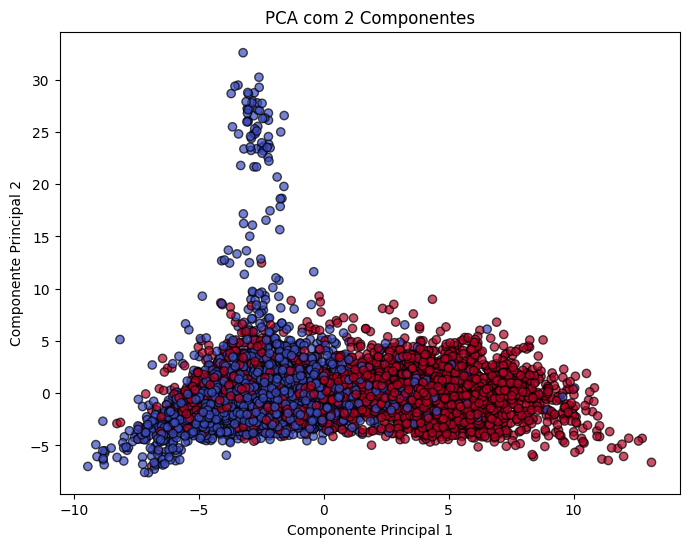

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA com 2 Componentes")
plt.show()

In [88]:
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância acumulada:", pca.explained_variance_ratio_.cumsum())

Variância explicada por cada componente: [0.00574504 0.00404657]
Variância acumulada: [0.00574504 0.00979161]


Já no PCA com duas componentes já conseguimos observar que existe uma separação não aleatória dos dados.

Porém, quero explorar também como seria a separação com base em três componentes.

In [49]:
import plotly.express as px

In [89]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

In [90]:
df_pca3 = pd.DataFrame(X_pca3, columns=['PC1','PC2','PC3'])
df_pca3['diagnosis'] = y.values

fig = px.scatter_3d(
    df_pca3, x='PC1', y='PC2', z='PC3',
    color='diagnosis',
    title="PCA - 3 Componentes",
    opacity=0.7
)
fig.show()

In [91]:
print("Variância explicada (3D):", pca3.explained_variance_ratio_)
print("Variância acumulada (3D):", pca3.explained_variance_ratio_.cumsum())

Variância explicada (3D): [0.00574504 0.00404651 0.00304547]
Variância acumulada (3D): [0.00574504 0.00979155 0.01283702]


In [92]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
result = pca.explained_variance_ratio_.cumsum()
print(result[-1]) #só testando o acesso ao ultimo elemento


0.015521228745347303


In [93]:
def busca_melhor_pca():
  dict_pca = {}
  for i in range(1,31):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    result = pca.explained_variance_ratio_.cumsum()
    print(f'{i} - {result[-1]}')
    dict_pca[i] = result[-1]
  return dict_pca

In [94]:
resultados = busca_melhor_pca()


1 - 0.005745041628605488
2 - 0.009791553249932
3 - 0.012833857768387186
4 - 0.015521593539093447
5 - 0.01801808286239308
6 - 0.020423072798368403
7 - 0.022719019565331247
8 - 0.02493722686465627
9 - 0.02707892828489215
10 - 0.029110173914517194
11 - 0.03105361739639087
12 - 0.03292443021928742
13 - 0.03478562480530533
14 - 0.036622820113497406
15 - 0.03842022378244025
16 - 0.04018512912297777
17 - 0.04184685688918866
18 - 0.043521076675107094
19 - 0.045204725031219126
20 - 0.04674974366505888
21 - 0.04850341852802896
22 - 0.05013760548489457
23 - 0.051618606610841083
24 - 0.05326479267479107
25 - 0.05475308331033621
26 - 0.05631037555317377
27 - 0.057787184429383444
28 - 0.0593016250257893
29 - 0.060879040413667464
30 - 0.06233159636753625


## Treinamento do modelo

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, RocCurveDisplay
)

In [97]:
pos_label = 1
pos_name = "1"
#qtd de itens por classe
print(y.value_counts())

label
1    3528
0    3528
Name: count, dtype: int64


In [113]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


In [100]:
def modelos():
    #trabalhando com o pipeline, para cada modelo vou precisar de um tipo e ai usando um dicionário consigo organizar isso.
    #o Scaler por exemplo, será aplicado aplicado em modelos que se beneficiam dele.
    #scaled_models serão os que precisam e unscalad serão os que não precisam.

    scaled_models = {
        "Logistic Regression": LogisticRegression(
            max_iter=1000, n_jobs=None, class_weight="balanced", random_state=42
        ),
        "Perceptron": Perceptron(
            max_iter=2000, early_stopping=True, validation_fraction=0.1,
            n_iter_no_change=10, class_weight="balanced", random_state=42
        ),
        "SVM (RBF)": SVC(
            kernel="rbf", C=1.0, gamma="scale", class_weight="balanced",
            probability=False, random_state=42
        ),
        "KNN (k=11)": KNeighborsClassifier(n_neighbors=11, weights="distance"),
        "MLP (Neural Net)": MLPClassifier(
            hidden_layer_sizes=(64, 32), activation="relu", max_iter=1000,
            random_state=42
        ),
    }

    unscaled_models = {
        "GaussianNB": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(
            max_depth=None, class_weight="balanced", random_state=42
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=300, max_depth=None, class_weight="balanced_subsample",
            n_jobs=-1, random_state=42
        ),
        "AdaBoost": AdaBoostClassifier(
            n_estimators=300, learning_rate=0.5, random_state=42
        ),
        "XGBoost": XGBClassifier(
                n_estimators=400, max_depth=4, learning_rate=0.05,
                subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
                eval_metric="logloss", n_jobs=-1, random_state=42
            )
    }

    # Empacota em pipelines
    models = {}
    for name, est in scaled_models.items():
        models[name] = make_pipeline(StandardScaler(), est)
    for name, est in unscaled_models.items():
        models[name] = Pipeline([("clf", est)])  # sem scaler

    return models

In [101]:
def score_continuo(model, X):
    # 1) Tenta usar o "decision_function" (ótimo p/ ROC/AUC)
    fn = getattr(model, "decision_function", None)
    if callable(fn):
        return fn(X)

    # 2) Senão, tenta probabilidade e pega a classe positiva
    fn = getattr(model, "predict_proba", None)
    if callable(fn):
        return fn(X)[:, 1]

    # 3) Último recurso: usa a predição binária como score (menos ideal)
    return model.predict(X).astype(float)

def _specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else np.nan

In [114]:
def compare_models(X_treino,y_treino,X_teste, y_teste):
    X_train = X_treino # A coluna ID já havia tirado no tratamento anterior
    y_train = y_treino
    X_test = X_teste
    y_test = y_teste

    models = modelos()

    # Avaliação
    rows = []
    roc_points = {}  # para plotar depois

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_score = score_continuo(model, X_test) ##esbarrei num problema aqui por conta da forma de calcular os scores e ai precisei criar uma função pra mudar o tipo de score dependendo do modelo

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        spec = _specificity(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_score)
        mcc  = matthews_corrcoef(y_test, y_pred)

        fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
        roc_points[name] = (fpr, tpr, auc)

        rows.append({ ##aproveitar pra unificar os dados e ai podemos ver como todos os modelos se comportam
            "Modelo": name,
            "MCC": mcc,
            "ACC": acc,
            "PR": prec,
            "REC": rec,
            "ESP": spec,
            "F1": f1,
            "AUC": auc
        })

    results_df = pd.DataFrame(rows).sort_values("AUC", ascending=False).reset_index(drop=True)

    # Plot ROC combinado
    fig, ax = plt.subplots(figsize=(7.5, 6))
    ax.plot([0, 1], [0, 1], linestyle="--", linewidth=1, label="Aleatório")

    for name, (fpr, tpr, auc) in roc_points.items():
        ax.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC={auc:.3f})")

    ax.set_xlabel("Falso Positivo (1 - Especificidade)")
    ax.set_ylabel("Verdadeiro Positivo (Recall)")
    ax.set_title(f"Comparação entre modelos")
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(True, linestyle="--", alpha=0.4)

    return results_df, (fig, ax), models

In [117]:
def analise_resultados(df, csv_filename="resultados_modelos.csv", round_ndigits=4, sep=","):
    """
    - Adiciona a linha de MÉDIA.
    - Imprime TABELA 1 (todas as métricas) e TABELA 2 (melhor por métrica).
    - Exporta um CSV simples com df.to_csv("arquivo.csv").
    - Retorna (df_out, winners_dict).
    """
    metrics_cols = ["MCC", "ACC", "PR", "REC", "ESP", "F1", "AUC"]

    # Linha de médias
    linha_media = df[metrics_cols].mean(numeric_only=True).to_dict()
    linha_media["Modelo"] = "MÉDIA"
    df_out = pd.concat([df, pd.DataFrame([linha_media])], ignore_index=True)

    # Tabela 1
    print("TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO")
    print(df_out.round(round_ndigits))

    # Tabela 2: melhor por métrica
    print("\n\nTABELA 2: MELHOR MODELO POR MÉTRICA")
    winners = {}
    for col in metrics_cols:
        col_valid = pd.to_numeric(df_out[col], errors="coerce")
        max_val = col_valid.max()
        winners[col] = df_out.loc[col_valid == max_val, "Modelo"].tolist()
        nomes = ", ".join(winners[col])
        print(f"{col}: {nomes} {max_val:.3f}")
    print("\n")

    # Exportar CSV simples (sem paths)
    if csv_filename:
        df_out.round(round_ndigits).to_csv(csv_filename, index=False, sep=sep)
        print(f"[OK] CSV exportado: {csv_filename}")

    return df_out, winners

In [110]:
#carregando dados de teste do artigo
df_teste = pd.read_csv('/content/cpps-toxic_test_matrix-pos883-neg883.csv')

In [111]:
#dados de treino
X_treino = df_final[lista_features]
y_treino = df_final['label'].astype('int64')
y_treino.name = 'label'
#dados_teste

X_teste = df_teste[lista_features]
y_teste = df_teste['label'].astype('int64')
y_teste.name = 'label'

assert X_treino.index.equals(y_treino.index)
assert X_teste.index.equals(y_teste.index)

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0         Random Forest  0.6611  0.8290  0.8645  0.7803  0.8777  0.8202   
1               XGBoost  0.6499  0.8233  0.8591  0.7735  0.8732  0.8141   
2              AdaBoost  0.5933  0.7899  0.8678  0.6840  0.8958  0.7650   
3             SVM (RBF)  0.5712  0.7826  0.8305  0.7101  0.8550  0.7656   
4      MLP (Neural Net)  0.5369  0.7684  0.7737  0.7588  0.7780  0.7662   
5            Perceptron  0.5007  0.7503  0.7570  0.7373  0.7633  0.7470   
6   Logistic Regression  0.4858  0.7429  0.7440  0.7407  0.7452  0.7423   
7         Decision Tree  0.5199  0.7599  0.7653  0.7497  0.7701  0.7574   
8            GaussianNB  0.4589  0.7288  0.7475  0.6908  0.7667  0.7181   
9            KNN (k=11)  0.1997  0.5617  0.5346  0.9547  0.1687  0.6854   
10                MÉDIA  0.5177  0.7537  0.7744  0.7580  0.7494  0.7581   

       AUC  
0   0.9122  
1   0.9096

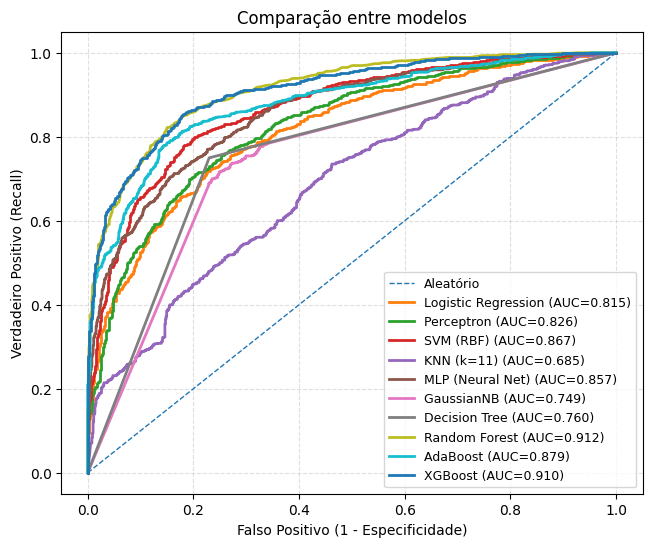

In [116]:
results_df, (fig, ax), models = compare_models(X_treino,y_treino, X_teste, y_teste)
analise_resultados(results_df)
plt.show()

In [118]:
analise_resultados(results_df)

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0         Random Forest  0.6611  0.8290  0.8645  0.7803  0.8777  0.8202   
1               XGBoost  0.6499  0.8233  0.8591  0.7735  0.8732  0.8141   
2              AdaBoost  0.5933  0.7899  0.8678  0.6840  0.8958  0.7650   
3             SVM (RBF)  0.5712  0.7826  0.8305  0.7101  0.8550  0.7656   
4      MLP (Neural Net)  0.5369  0.7684  0.7737  0.7588  0.7780  0.7662   
5            Perceptron  0.5007  0.7503  0.7570  0.7373  0.7633  0.7470   
6   Logistic Regression  0.4858  0.7429  0.7440  0.7407  0.7452  0.7423   
7         Decision Tree  0.5199  0.7599  0.7653  0.7497  0.7701  0.7574   
8            GaussianNB  0.4589  0.7288  0.7475  0.6908  0.7667  0.7181   
9            KNN (k=11)  0.1997  0.5617  0.5346  0.9547  0.1687  0.6854   
10                MÉDIA  0.5177  0.7537  0.7744  0.7580  0.7494  0.7581   

       AUC  
0   0.9122  
1   0.9096

(                 Modelo       MCC       ACC        PR       REC       ESP  \
 0         Random Forest  0.661127  0.828992  0.864492  0.780294  0.877690   
 1               XGBoost  0.649895  0.823330  0.859119  0.773499  0.873160   
 2              AdaBoost  0.593299  0.789921  0.867816  0.684032  0.895810   
 3             SVM (RBF)  0.571152  0.782559  0.830464  0.710079  0.855040   
 4      MLP (Neural Net)  0.536906  0.768403  0.773672  0.758777  0.778029   
 5            Perceptron  0.500736  0.750283  0.756977  0.737259  0.763307   
 6   Logistic Regression  0.485849  0.742922  0.744027  0.740657  0.745187   
 7         Decision Tree  0.519927  0.759909  0.765318  0.749717  0.770102   
 8            GaussianNB  0.458854  0.728766  0.747549  0.690827  0.766704   
 9            KNN (k=11)  0.199655  0.561721  0.534559  0.954700  0.168743   
 10                MÉDIA  0.517740  0.753681  0.774399  0.757984  0.749377   
 
           F1       AUC  
 0   0.820238  0.912216  
 1   0.814

In [119]:
df_final = pd.read_csv('/content/cpps-toxic_trained_matrix-pos2772-neg2772.csv')
df_teste = pd.read_csv('/content/cpps-toxic_test_matrix-pos694-neg694.csv')

In [120]:
#dados de treino
X_treino = df_final[lista_features]
y_treino = df_final['label'].astype('int64')
y_treino.name = 'label'
#dados_teste

X_teste = df_teste[lista_features]
y_teste = df_teste['label'].astype('int64')
y_teste.name = 'label'

assert X_treino.index.equals(y_treino.index)
assert X_teste.index.equals(y_teste.index)

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0               XGBoost  0.6534  0.8256  0.8542  0.7853  0.8660  0.8183   
1         Random Forest  0.6314  0.8148  0.8398  0.7781  0.8516  0.8078   
2              AdaBoost  0.5959  0.7932  0.8564  0.7046  0.8818  0.7731   
3             SVM (RBF)  0.5841  0.7903  0.8255  0.7363  0.8444  0.7784   
4      MLP (Neural Net)  0.6011  0.8004  0.8098  0.7853  0.8156  0.7974   
5            Perceptron  0.5432  0.7716  0.7720  0.7709  0.7723  0.7714   
6   Logistic Regression  0.5043  0.7522  0.7529  0.7507  0.7536  0.7518   
7            GaussianNB  0.5699  0.7846  0.7997  0.7594  0.8098  0.7790   
8         Decision Tree  0.5375  0.7687  0.7731  0.7608  0.7767  0.7669   
9            KNN (k=11)  0.1933  0.5612  0.5345  0.9481  0.1744  0.6836   
10                MÉDIA  0.5414  0.7663  0.7818  0.7780  0.7546  0.7728   

       AUC  
0   0.9038  
1   0.9026

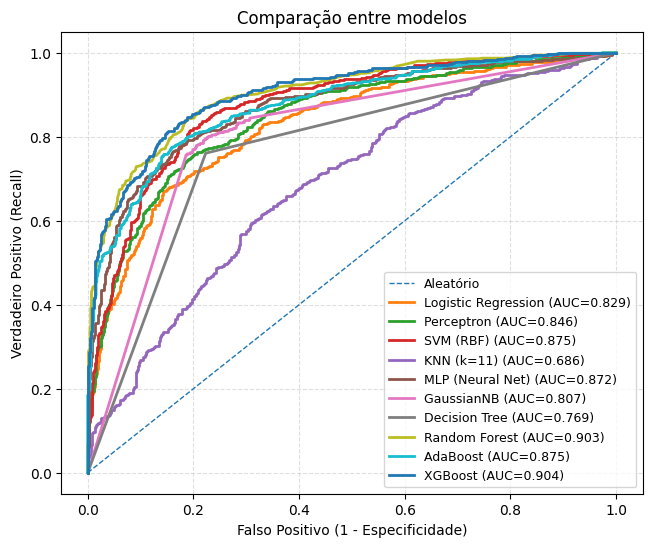

In [121]:
results_df, (fig, ax), models = compare_models(X_treino,y_treino, X_teste, y_teste)
analise_resultados(results_df)
plt.show()

Agora como temos um panorama geral pras 2500 features, vou criar uma função para variarmos a quantidade de features, ir crescendo e comparando os resultados com os estado da arte


In [123]:
def ler_dados(treino, teste, amostra, features = significativas):
  df_final = pd.read_csv(treino)
  df_teste = pd.read_csv(teste)
  features_alvo = features[features["Pvalue"] < 0.05].head(amostra)
  lista_features = features_alvo.index.tolist()
  #dados de treino
  X_T = df_final[lista_features]
  y_T = df_final['label'].astype('int64')
  y_T.name = 'label'
  #dados_teste
  X_TE = df_teste[lista_features]
  y_TE = df_teste['label'].astype('int64')
  y_TE.name = 'label'

  return X_T, y_T, X_TE, y_TE

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0               XGBoost  0.6437  0.8199  0.8590  0.7656  0.8743  0.8096   
1         Random Forest  0.6294  0.8126  0.8538  0.7542  0.8709  0.8010   
2             SVM (RBF)  0.6064  0.8007  0.8453  0.7361  0.8652  0.7869   
3              AdaBoost  0.5846  0.7854  0.8642  0.6772  0.8935  0.7594   
4   Logistic Regression  0.5970  0.7945  0.8523  0.7123  0.8766  0.7761   
5      MLP (Neural Net)  0.5428  0.7707  0.7922  0.7339  0.8075  0.7619   
6            KNN (k=11)  0.5118  0.7446  0.8462  0.5980  0.8913  0.7007   
7            Perceptron  0.4577  0.7288  0.7343  0.7169  0.7407  0.7255   
8            GaussianNB  0.5320  0.7475  0.8909  0.5640  0.9309  0.6907   
9         Decision Tree  0.5054  0.7525  0.7617  0.7350  0.7701  0.7481   
10                MÉDIA  0.5611  0.7757  0.8300  0.6993  0.8521  0.7560   

       AUC  
0   0.8994  
1   0.8981

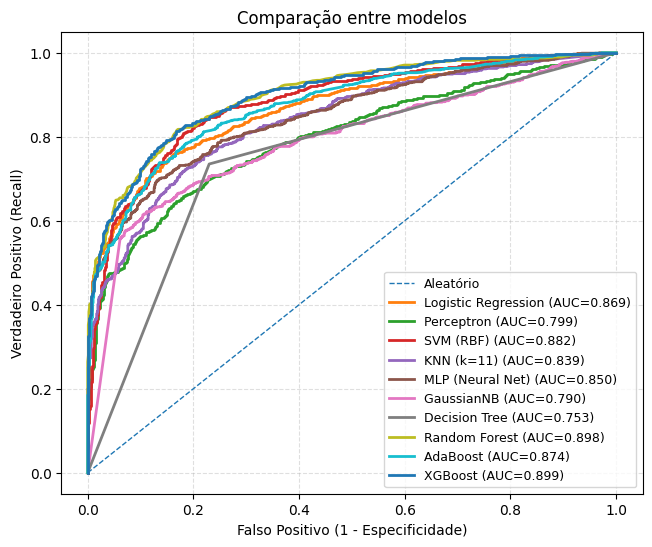

In [125]:
treino = '/content/cpps-toxic_trained_matrix-pos3528-neg3528.csv'
teste = '/content/cpps-toxic_test_matrix-pos883-neg883.csv'
amostra = 200
cd = '9'
X_tr, y_tr, X_te, y_te  = ler_dados(treino, teste, amostra)
results_df, (fig, ax), models = compare_models(X_tr, y_tr, X_te, y_te )
analise_resultados(results_df, csv_filename=f"resultados_modelos-{amostra}-Dados-CD0{9}-arquivo.csv")
plt.show()

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0               XGBoost  0.6435  0.8199  0.8580  0.7667  0.8732  0.8098   
1         Random Forest  0.6426  0.8194  0.8588  0.7644  0.8743  0.8089   
2              AdaBoost  0.5896  0.7877  0.8681  0.6784  0.8969  0.7616   
3             SVM (RBF)  0.5826  0.7894  0.8271  0.7316  0.8471  0.7764   
4   Logistic Regression  0.5852  0.7905  0.8301  0.7305  0.8505  0.7771   
5      MLP (Neural Net)  0.5323  0.7661  0.7664  0.7656  0.7667  0.7660   
6            KNN (k=11)  0.4882  0.7395  0.7966  0.6433  0.8358  0.7118   
7            Perceptron  0.4562  0.7276  0.7433  0.6954  0.7599  0.7185   
8            GaussianNB  0.5401  0.7565  0.8731  0.6002  0.9128  0.7114   
9         Decision Tree  0.5454  0.7724  0.7867  0.7475  0.7973  0.7666   
10                MÉDIA  0.5606  0.7769  0.8208  0.7123  0.8414  0.7608   

       AUC  
0   0.9014  
1   0.9013

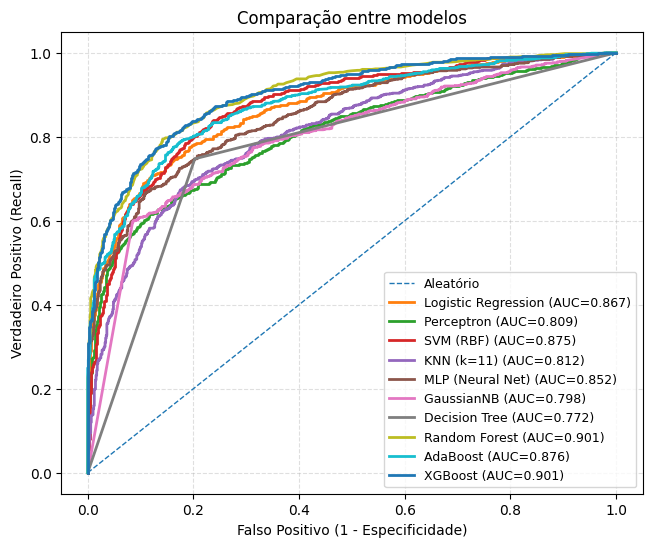

In [126]:
amostra = 400
cd = '9'
X_tr, y_tr, X_te, y_te  = ler_dados(treino, teste, amostra)
results_df, (fig, ax), models = compare_models(X_tr, y_tr, X_te, y_te )
analise_resultados(results_df, csv_filename=f"resultados_modelos-{amostra}-Dados-CD0{9}-arquivo.csv")
plt.show()

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0         Random Forest  0.6475  0.8222  0.8570  0.7735  0.8709  0.8131   
1               XGBoost  0.6393  0.8182  0.8512  0.7712  0.8652  0.8093   
2              AdaBoost  0.5973  0.7922  0.8686  0.6886  0.8958  0.7682   
3             SVM (RBF)  0.5900  0.7945  0.8133  0.7644  0.8245  0.7881   
4      MLP (Neural Net)  0.5769  0.7882  0.7998  0.7690  0.8075  0.7841   
5   Logistic Regression  0.5889  0.7928  0.8276  0.7395  0.8460  0.7811   
6            Perceptron  0.4726  0.7361  0.7456  0.7169  0.7554  0.7309   
7            GaussianNB  0.5227  0.7514  0.8458  0.6149  0.8879  0.7121   
8            KNN (k=11)  0.3853  0.6920  0.6767  0.7350  0.6489  0.7047   
9         Decision Tree  0.5330  0.7661  0.7811  0.7395  0.7928  0.7597   
10                MÉDIA  0.5553  0.7754  0.8067  0.7313  0.8195  0.7651   

       AUC  
0   0.9072  
1   0.9021

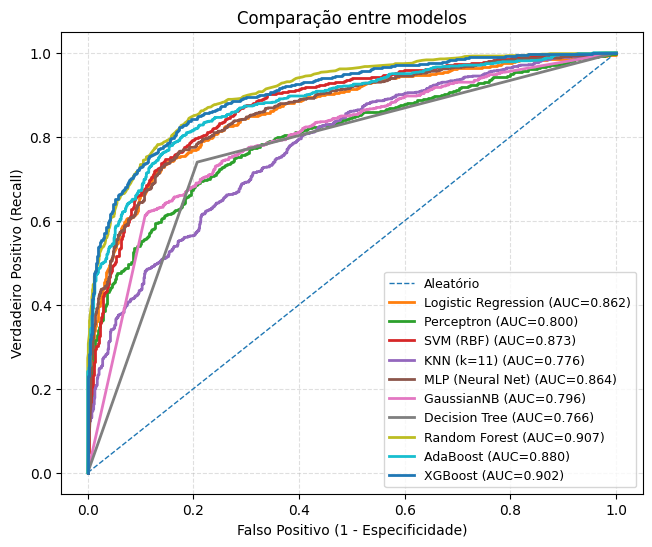

In [127]:
amostra = 600
cd = '9'
X_tr, y_tr, X_te, y_te  = ler_dados(treino, teste, amostra)
results_df, (fig, ax), models = compare_models(X_tr, y_tr, X_te, y_te )
analise_resultados(results_df, csv_filename=f"resultados_modelos-{amostra}-Dados-CD0{9}-arquivo.csv")
plt.show()

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0         Random Forest  0.6566  0.8267  0.8620  0.7780  0.8754  0.8179   
1               XGBoost  0.6481  0.8228  0.8545  0.7780  0.8675  0.8145   
2              AdaBoost  0.5963  0.7916  0.8684  0.6874  0.8958  0.7674   
3             SVM (RBF)  0.5971  0.7978  0.8200  0.7633  0.8324  0.7906   
4      MLP (Neural Net)  0.5680  0.7837  0.7979  0.7599  0.8075  0.7784   
5   Logistic Regression  0.5726  0.7854  0.8103  0.7452  0.8256  0.7764   
6            Perceptron  0.4979  0.7480  0.7717  0.7044  0.7916  0.7365   
7            GaussianNB  0.5167  0.7514  0.8265  0.6365  0.8664  0.7191   
8            KNN (k=11)  0.3873  0.6931  0.6797  0.7305  0.6557  0.7041   
9         Decision Tree  0.5292  0.7644  0.7737  0.7475  0.7814  0.7604   
10                MÉDIA  0.5570  0.7765  0.8065  0.7331  0.8199  0.7665   

       AUC  
0   0.9087  
1   0.9052

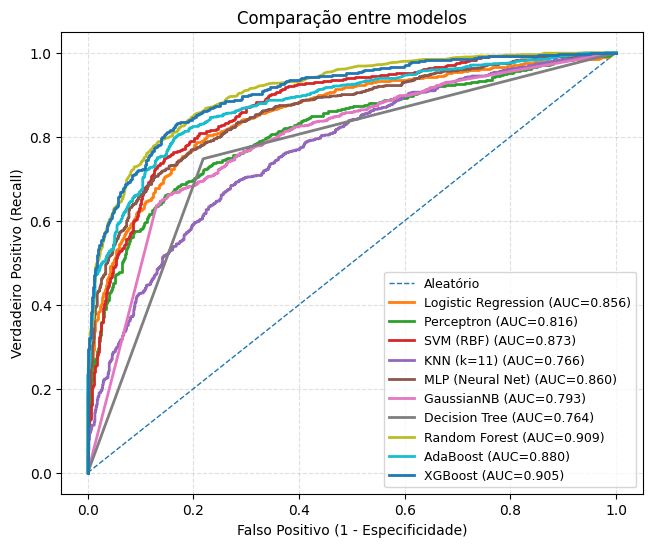

In [128]:
amostra = 800
cd = '9'
X_tr, y_tr, X_te, y_te  = ler_dados(treino, teste, amostra)
results_df, (fig, ax), models = compare_models(X_tr, y_tr, X_te, y_te )
analise_resultados(results_df, csv_filename=f"resultados_modelos-{amostra}-Dados-CD0{9}-arquivo.csv")
plt.show()

TABELA 1: VALORES GERAIS DAS MÉTRICAS DE DESEMPENHO POR MODELO
                 Modelo     MCC     ACC      PR     REC     ESP      F1  \
0         Random Forest  0.6531  0.8250  0.8596  0.7769  0.8732  0.8162   
1               XGBoost  0.6520  0.8245  0.8595  0.7758  0.8732  0.8155   
2              AdaBoost  0.5963  0.7916  0.8684  0.6874  0.8958  0.7674   
3             SVM (RBF)  0.5972  0.7984  0.8096  0.7803  0.8165  0.7947   
4      MLP (Neural Net)  0.5415  0.7707  0.7773  0.7588  0.7826  0.7679   
5   Logistic Regression  0.5479  0.7735  0.7899  0.7452  0.8018  0.7669   
6            Perceptron  0.4887  0.7441  0.7562  0.7203  0.7678  0.7378   
7            GaussianNB  0.5024  0.7452  0.8133  0.6365  0.8539  0.7141   
8         Decision Tree  0.5258  0.7627  0.7723  0.7452  0.7803  0.7585   
9            KNN (k=11)  0.3613  0.6806  0.6819  0.6772  0.6840  0.6795   
10                MÉDIA  0.5466  0.7716  0.7988  0.7304  0.8129  0.7619   

       AUC  
0   0.9093  
1   0.9052

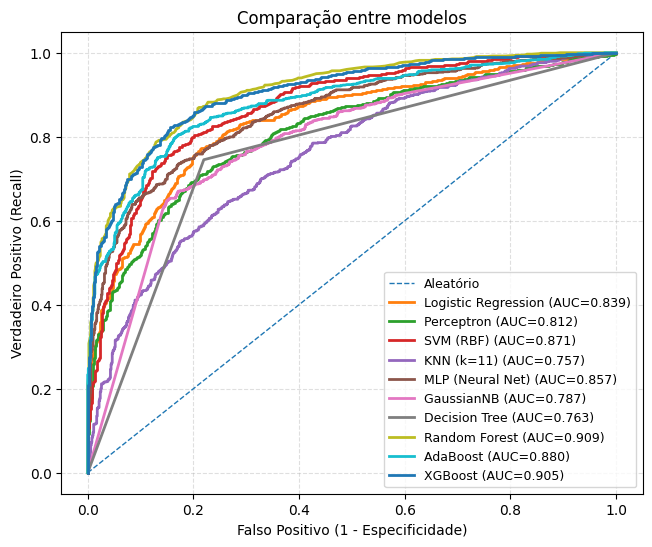

In [129]:
amostra = 1000
cd = '9'
X_tr, y_tr, X_te, y_te  = ler_dados(treino, teste, amostra)
results_df, (fig, ax), models = compare_models(X_tr, y_tr, X_te, y_te)
analise_resultados(results_df, csv_filename=f"resultados_modelos-{amostra}-Dados-CD0{9}-arquivo.csv")
plt.show()